In [6]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email='your@email.com'
#search Genbank, returns accession numbers (up to 100)
handle=Entrez.esearch(db='nucleotide', retmax=3, term="rbcl[All Fields]", idtype="acc") 
record = Entrez.read(handle)
print(handle)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

df= pd.read_csv("webmd.csv")
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
df.dropna(subset=df.columns.difference(['Reviews']), how='all')

#Sex
df= df[df.Sex != ' ']
df= df[df.Age != ' ']

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331577 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Age            331577 non-null  object        
 1   Condition      331577 non-null  object        
 2   Date           331577 non-null  datetime64[ns]
 3   Drug           331577 non-null  object        
 4   DrugId         331577 non-null  int64         
 5   EaseofUse      331577 non-null  int64         
 6   Effectiveness  331577 non-null  int64         
 7   Reviews        331545 non-null  object        
 8   Satisfaction   331577 non-null  int64         
 9   Sex            331577 non-null  object        
 10  Sides          331577 non-null  object        
 11  UsefulCount    331577 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 32.9+ MB
None


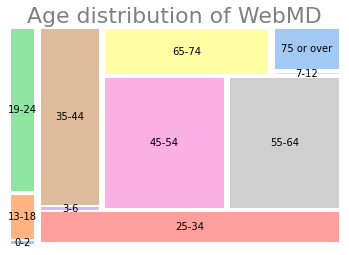

In [17]:
#Age
#print(df.Age.unique())
#df= df[df.Age != ' ']
#print(df.Age.value_counts())

df_age= df.groupby(['Age']).count()['DrugId'].reset_index()

squarify.plot(sizes=df_age['DrugId'], label=df_age['Age'], alpha= 1, pad = 0.2, color = sns.color_palette("pastel"))

plt.text(50, 100, 'Age distribution of WebMD', fontsize = 22, color='grey', horizontalalignment='center',
         verticalalignment='bottom', zorder = 20) 
plt.axis('off')
plt.show()

In [102]:
#Most common conditions by age groups
df_cond= df.groupby(['Age', 'Condition']).count()['DrugId'].reset_index()
df_cond= df_cond[df_cond.Condition != 'Other']

Ages = df.Age.unique()

df_cond_top= []
m=  {}

for i in Ages:
    m = df_cond[df_cond.Age == i]
    m = m.sort_values(by='DrugId', ascending= False).head()#.to_string(header=False)
    df_cond_top.append(m)

df_cond_top = pd.concat(df_cond_top)
print(df_cond_top)

             Age                                          Condition  DrugId
7299  75 or over                                High Blood Pressure    1784
7488  75 or over                                               Pain     648
7683  75 or over                           Type 2 Diabetes Mellitus     480
7464  75 or over                                   Neuropathic Pain     381
7160  75 or over                           Chronic Trouble Sleeping     344
1325       25-34                                      Birth Control    4482
1823       25-34                                               Pain    3386
1461       25-34                                         Depression    2686
1322       25-34                                 Bipolar Depression    1329
1298       25-34      Attention Deficit Disorder with Hyperactivity    1279
6208       65-74                                High Blood Pressure    4397
6452       65-74                                               Pain    1866
6739       6

In [94]:
df.head()
#.drop(df.index[0])
print(df_cond_top)

             Age                 Condition  DrugId
7299  75 or over       High Blood Pressure    1784
7488  75 or over                      Pain     648
7683  75 or over  Type 2 Diabetes Mellitus     480
7464  75 or over          Neuropathic Pain     381
7160  75 or over  Chronic Trouble Sleeping     344


In [58]:
#Bar for unique values
#EaseofUse
print(df.EaseofUse.value_counts())
#Condition
print(df.Condition.value_counts())
#Satisfaction
print(df.Satisfaction.value_counts())
#Drug
print(df.Drug.value_counts())
#Effectiveness
print(df.Effectiveness.value_counts())

5    180801
4     69561
3     37726
1     31775
2     16404
6         2
Name: EaseofUse, dtype: int64
Other                                               47662
Pain                                                23636
High Blood Pressure                                 21637
Depression                                          13814
Birth Control                                       11195
                                                    ...  
Prevent Mother's Rh Factor Reaction in Baby             1
Continued Painful Erection                              1
Inflammation of a Hair Follicle                         1
Pneumonia caused by Gram-Negative Bacteria              1
Recurrent Persistent Inflammation of the Urethra        1
Name: Condition, Length: 1754, dtype: int64
5    103610
1     92694
4     59032
3     48161
2     32770
6         2
Name: Satisfaction, dtype: int64
cymbalta                                              4451
lisinopril                                          

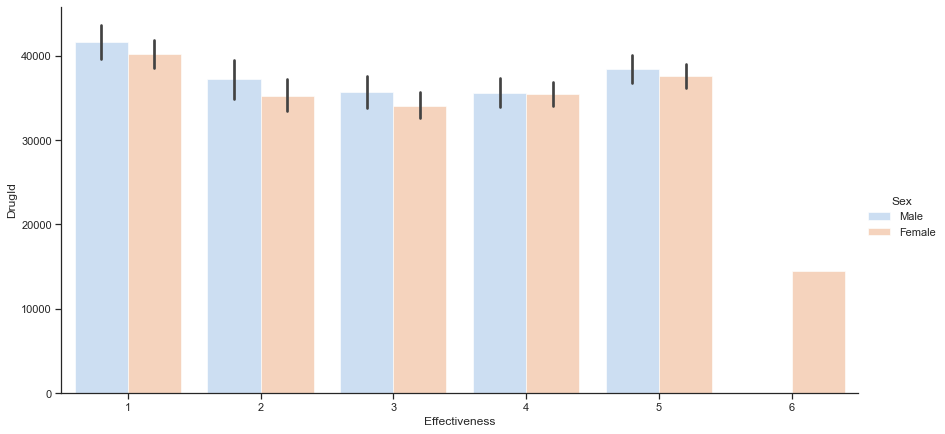

In [5]:
df_cond= df.groupby(['Age', 'Condition', 'Effectiveness', 'Sex']).mean()['DrugId'].reset_index()

sns.set_theme(style="ticks", palette="pastel")

sns.catplot(
    data=df_cond , kind="bar",
    x="Effectiveness", y = 'DrugId', hue="Sex", aspect = 2,
    #ci="sd", 
    alpha=.6, height=6, palette = 'pastel'
)

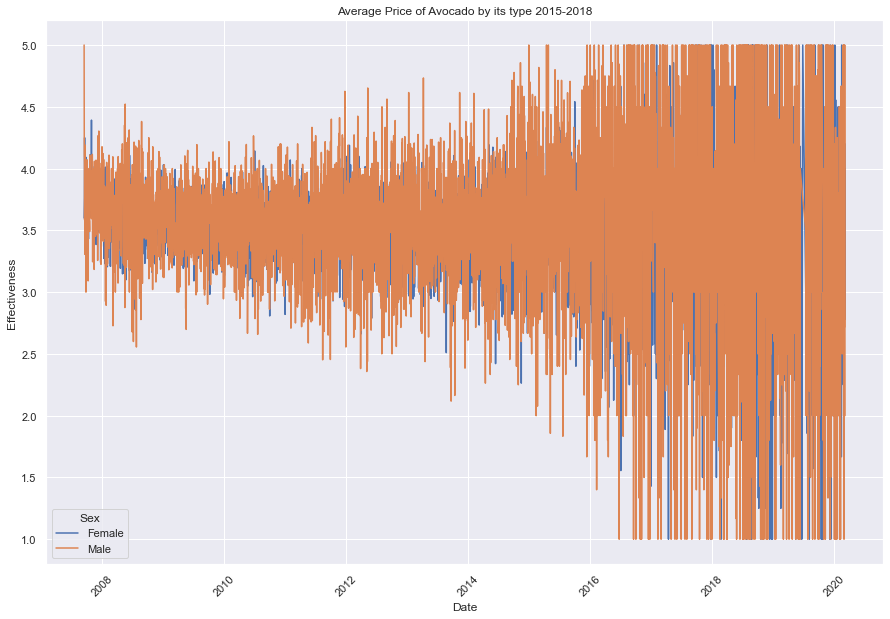

In [43]:
df_sat= df.groupby(['Date', 'Sex']).mean()['Effectiveness'].reset_index()
ax = sns.set(rc={'figure.figsize':(15,10)})

plt.title('Average Price of Avocado by its type 2015-2018')
plt.xticks(rotation =45)
ax = sns.lineplot(x="Date",y="Effectiveness", hue='Sex', data=df_sat)

In [63]:
x = df.Drug.value_counts()
x

cymbalta                                              4451
lisinopril                                            4022
lisinopril solution                                   4022
lexapro                                               3912
hydrocodone-acetaminophen                             3661
                                                      ... 
fiber-lax                                                1
bromi-lotion lotion                                      1
pembrolizumab solution, reconstituted (recon soln)       1
iron 100 plus                                            1
sodium phosphate vial                                    1
Name: Drug, Length: 6846, dtype: int64

In [89]:
#Most common conditions
df_drug= df.groupby(['Condition']).count()['DrugId'].reset_index()
df_drug= df_drug[df_drug.Condition != 'Other']
df_drug= df_drug[df_drug.DrugId > 100]
df_drug = df_drug.sort_values(by='DrugId', ascending= False)
#df_drug = df_drug.head(50)
print(df_drug.head(50))

                                              Condition  DrugId
1202                                               Pain   25232
760                                 High Blood Pressure   23275
515                                          Depression   14509
241                                       Birth Control   12253
1155                                   Neuropathic Pain    8988
1694                           Type 2 Diabetes Mellitus    7648
410                            Chronic Trouble Sleeping    7408
195       Attention Deficit Disorder with Hyperactivity    6801
238                                  Bipolar Depression    5946
1106                                Migraine Prevention    4988
1212                                     Panic Disorder    4867
1062                          Major Depressive Disorder    4256
1427                       Repeated Episodes of Anxiety    4138
1439                               Rheumatoid Arthritis    3963
1196                                    

In [74]:
df.Condition.value_counts()

Other                                                      49765
Pain                                                       25232
High Blood Pressure                                        23275
Depression                                                 14509
Birth Control                                              12253
                                                           ...  
Chorea Prevention                                              1
Softening of Bones from Seizure Medications                    1
Skin Disease with Hardened Patches of Skin                     1
Inflammation of Uvea of the Eye not caused by Infection        1
Recurrent Persistent Inflammation of the Urethra               1
Name: Condition, Length: 1806, dtype: int64